# モンテカルロ積分

\begin{align}
% \begin{flushleft}
{\Large
E[f] = \int p(x) f(x) dx \simeq \frac{1}{N} \sum_{n=1}^N f(x_n)
}
% \end{flushleft}
\end{align}

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import functools
%matplotlib inline

# 平均分散を計算する関数を定義

In [2]:
def monte_carlo_integration(vfunc, sampler, N):
    ret = []
    for i in range(100):
        x = sampler(size=N)
        y = vfunc(x)
        ret.append(np.mean(y))
    return (np.mean(ret), np.std(ret))

#  関数定義

In [3]:
def f1(x):
    return x

vfunc1 = np.vectorize(f1)
vfunc2 = scipy.stats.norm.pdf

# サンプリングする確率密度関数を定義

In [4]:
sampler1 = functools.partial(np.random.uniform, low=0, high=1)
sampler2 = functools.partial(np.random.uniform, low=-1, high=1)

# モンテカルロ積分実行

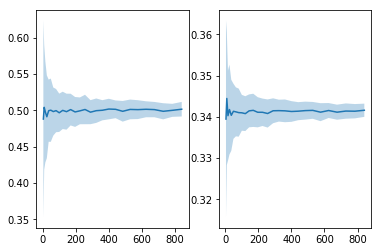

In [5]:
N = [i**2 for i in range(2, 30)]
ret1 = np.empty((len(N), 2))
ret2 = np.empty((len(N), 2))
for i, n in enumerate(N):
    ret1[i] = monte_carlo_integration(vfunc1, sampler1, n)
    ret2[i] = monte_carlo_integration(vfunc2, sampler2, n)

fig1 = plt.subplot(121)
fig1.plot(N, ret1[:, 0])
fig1.fill_between(N, ret1[:, 0] - ret1[:, 1], ret1[:, 0] + ret1[:, 1], alpha=0.3)

fig2 = plt.subplot(122)
fig2.plot(N, ret2[:, 0])
fig2.fill_between(N, ret2[:, 0] - ret2[:, 1], ret2[:, 0] + ret2[:, 1], alpha=0.3)
plt.show()

# モンテカルロ積分が不利な場合

In [6]:
sampler3 = np.random.normal

def func3(x):
    if x > 4.5:
        return 1
    else:
        return 0
vfunc3 = np.vectorize(func3)

# サンプリングする確率密度関数、被積分関数の定義

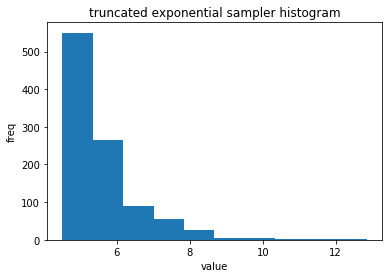

In [10]:
rv = scipy.stats.expon(loc=4.5)
sampler4 = rv.rvs
plt.hist(sampler4(size=1000))
plt.title("truncated exponential sampler histogram")
plt.xlabel("value")
plt.ylabel("freq")
plt.show()

def f4(x):
    if x < 4.5:
        return 0
    else:
        return scipy.stats.norm.pdf(x) / scipy.stats.expon(loc=4.5).pdf(x)
vfunc4 = np.vectorize(f4)

# 重点サンプリング

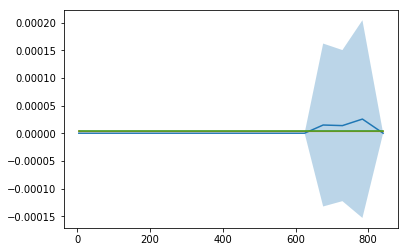

In [13]:
ret3 = np.empty((len(N), 2))
ret4 = np.empty((len(N), 2))
for i, n in enumerate(N):
    ret3[i] = monte_carlo_integration(vfunc3, sampler3, n)
    ret4[i] = monte_carlo_integration(vfunc4, sampler4, n)

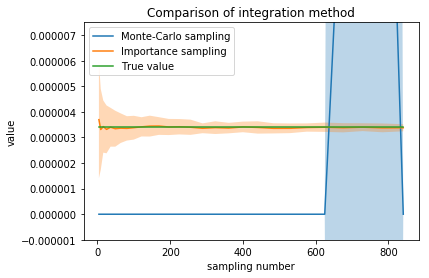

In [19]:
plt.title("Comparison of integration method")
plt.plot(N, ret3[:, 0], label="Monte-Carlo sampling")
plt.fill_between(N, ret3[:, 0] - ret3[:, 1], ret3[:, 0] + ret3[:, 1], alpha=0.3)    
plt.plot(N, ret4[:, 0], label="Importance sampling")
plt.fill_between(N, ret4[:, 0] - ret4[:, 1], ret4[:, 0] + ret4[:, 1], alpha=0.3)
result = scipy.integrate.quad(scipy.stats.norm.pdf, 4.5, np.inf)[0]
plt.plot(N, [result]*len(N), label="True value")
plt.legend()
plt.xlabel("sampling number")
plt.ylabel("value")
plt.ylim([-1e-6, 7.5e-6])
plt.show()